In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings

In [13]:
#upload the csv files
uploaded = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()

Saving train.csv.zip to train.csv (1).zip


Saving test.csv.zip to test.csv.zip


Saving test_labels.csv.zip to test_labels.csv.zip


In [28]:
#get data from csv files
zip_file_path = 'train.csv.zip'
data = pd.read_csv('train.csv.zip')
# Extract features and labels
X_train = data[['id','comment_text']]  # Features are in the 'comment_text' column
y_train = data[['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]  # Labels for toxicity classes

zip_file_path = 'test.csv.zip'
data = pd.read_csv('test.csv.zip')
X_test = data[['id','comment_text']]

zip_file_path = 'test_lables.csv.zip'
data = pd.read_csv('test_labels.csv.zip')
y_test = data[['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']]


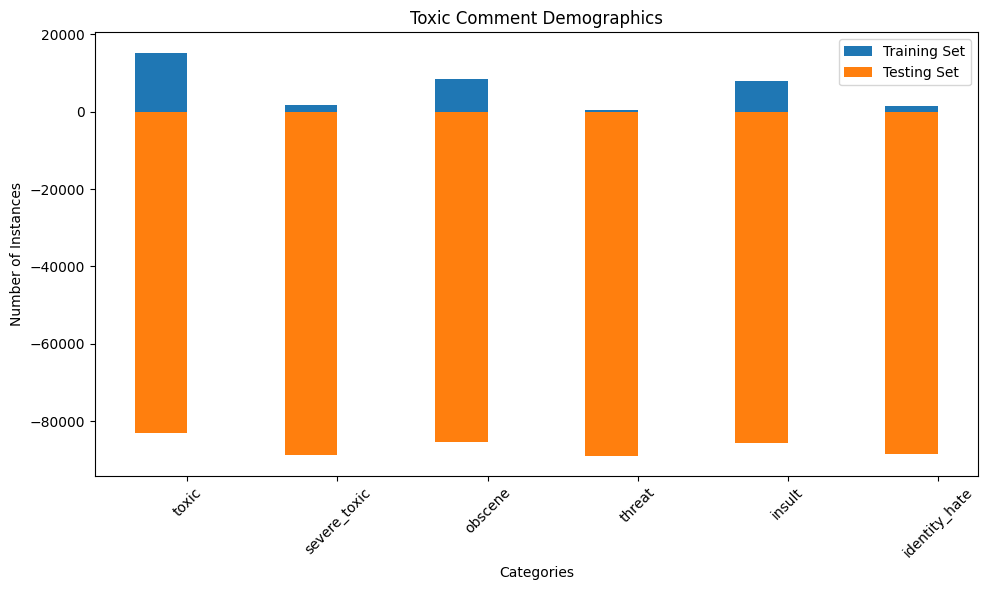

In [36]:
#give visual display of classifier distribution
train_category_counts = y_train.drop(columns='id').sum(axis=0).values.tolist()
# Count the occurrences of each toxicity category in the testing set
test_category_counts = y_test.drop(columns='id').sum(axis=0).values.tolist()

categories = y_train.drop(columns='id').columns.tolist()

# Create bar plot
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

train_bars = ax.bar(
    [i - bar_width / 2 for i in range(len(categories))],
    train_category_counts,
    width=bar_width,
    label='Training Set'
)

test_bars = ax.bar(
    [i - bar_width / 2 for i in range(len(categories))],
    test_category_counts,
    width=bar_width,
    label='Testing Set'
)

ax.set_xlabel('Categories')
ax.set_ylabel('Number of Instances')
ax.set_title('Toxic Comment Demographics')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [38]:
# Assuming X_train contains the comment strings and y_train contains the categories
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize Logistic Regression Classifier for binary classification
classifier = LogisticRegression(solver='liblinear')

# Use MultiOutputClassifier for multi-label classification
multi_target_classifier = MultiOutputClassifier(classifier)

# Train the model on the training data
multi_target_classifier.fit(tfidf_vectorizer.fit_transform(X_train['comment_text']), y_train.drop(columns='id'))




MultiOutputClassifier(estimator=LogisticRegression(solver='liblinear'))

In [41]:
# Get the category names from the columns of y_test
categories = y_test.drop(columns='id').columns.tolist()

# Get predictions on the test data
predictions = multi_target_classifier.predict(tfidf_vectorizer.transform(X_test['comment_text']))

# Calculate F1-score for each category
f1_scores = []
for i, category in enumerate(categories):
    f1 = f1_score(y_test[category], predictions[:, i],average=None)
    f1_scores.append(f1)

# Calculate the average F1-score across all categories
average_f1_score = sum(f1_scores) / len(f1_scores)

# Print the F1-scores for each category and the average F1-score
for i, category in enumerate(categories):
    print(f"F1-score for {category}: {f1_scores[i]}")

print(f"Average F1-score: {average_f1_score}")


F1-score for toxic: [0.         0.59803224 0.27457078]
F1-score for severe_toxic: [0.         0.58844099 0.14624506]
F1-score for obscene: [0.         0.59642459 0.25919193]
F1-score for threat: [0.         0.58816472 0.23021583]
F1-score for insult: [0.         0.58893946 0.24998146]
F1-score for identity_hate: [0.         0.5863392  0.19987429]
Average F1-score: [0.         0.59105687 0.22667989]
